In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style as style

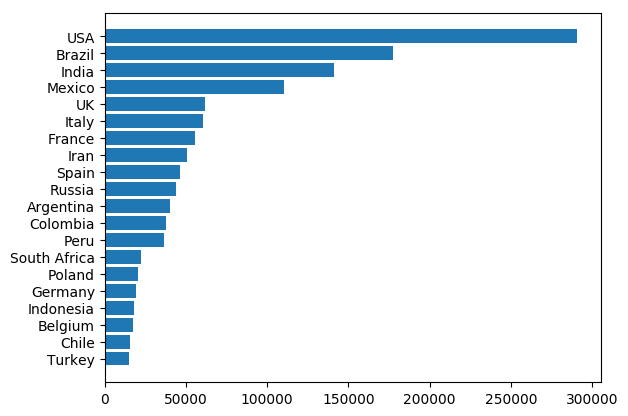

In [2]:
style.use('default')
top20_deathtoll = pd.read_csv('./top20_deathtoll.csv')
plt.barh(top20_deathtoll['Country_Other'],
         top20_deathtoll['Total_Deaths'])
plt.show()

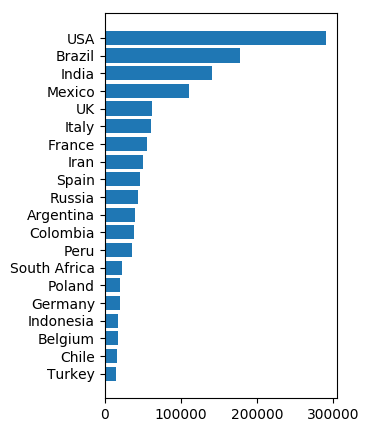

In [3]:
fig, ax = plt.subplots(figsize=(3,5))
ax.barh(top20_deathtoll['Country_Other'],
         top20_deathtoll['Total_Deaths'])
plt.show()

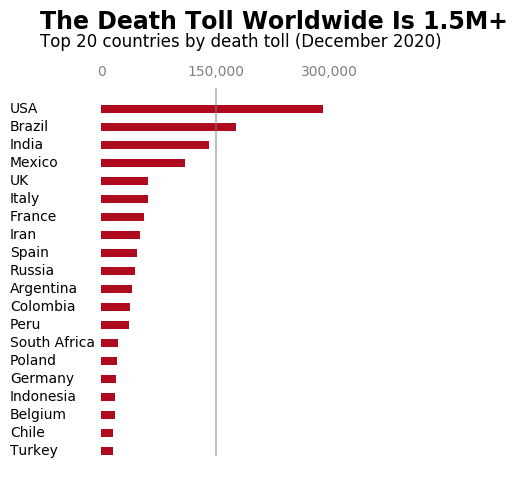

In [4]:
fig, ax = plt.subplots(figsize=(3,5)) #figsize is used to help adjust height and width
##height handles the thickness of the bar, color handles the color of the bar
ax.barh(top20_deathtoll['Country_Other'],
         top20_deathtoll['Total_Deaths'],height=0.45, color='#af0b1e') 
for location in ['left', 'right', 'bottom', 'top']:
    ax.spines[location].set_visible(False)  #used to remove the splines 
ax.set_xticks([0, 150000, 300000]) #putting custom ticks
ax.set_xticklabels(['0', '150,000', '300,000'])
ax.xaxis.tick_top() ##making the ticks at the top
ax.tick_params(bottom=False, left=False,top=False) #remove the ticks from the x-ases and y-axis
ax.tick_params(axis='x', colors='grey') #changing the x axis to gray color 


# Solution Code to do title and subtitle 
ax.text(x=-80000, y=23.5,
        s='The Death Toll Worldwide Is 1.5M+',
        weight='bold', size=17)
ax.text(x=-80000, y=22.5,
        s='Top 20 countries by death toll (December 2020)',
        size=12)

# custom writing the y-labels
ax.set_yticklabels([]) # an empty list removes the labels
country_names = top20_deathtoll['Country_Other']
for i, country in zip(range(20), country_names):
    ax.text(x=-120000, y=i-0.15, s=country)
    
# create a visual line at midpoint
ax.axvline(x=150000, ymin=0.045, c='grey', alpha=0.5)
#alpha controls the transparency,
#c controls the color
plt.show()

## Data Story

In [5]:
death_toll = pd.read_csv('./covid_avg_deaths.csv')


In [6]:
deaths = [2398, 126203, 227178, 295406]
proportions = [round(death/295406, 2) for death in deaths]
xmax_vals = [round(0.5 + proportion * 0.3, 3) for proportion in proportions]
print(proportions)
print(xmax_vals)

[0.01, 0.43, 0.77, 1.0]
[0.503, 0.629, 0.731, 0.8]


### starting point

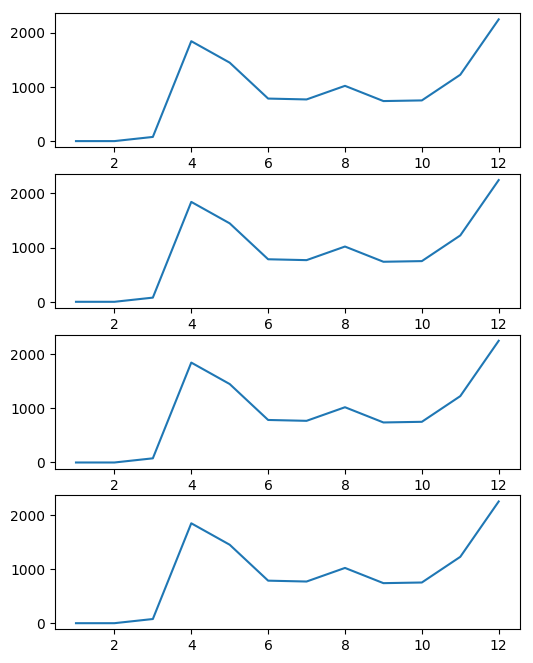

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=4, ncols=1,
                                         figsize=(6,8))
ax1.plot(death_toll['Month'], death_toll['New_deaths'])
ax2.plot(death_toll['Month'], death_toll['New_deaths'])
ax3.plot(death_toll['Month'], death_toll['New_deaths'])
ax4.plot(death_toll['Month'], death_toll['New_deaths'])
plt.show()

### After

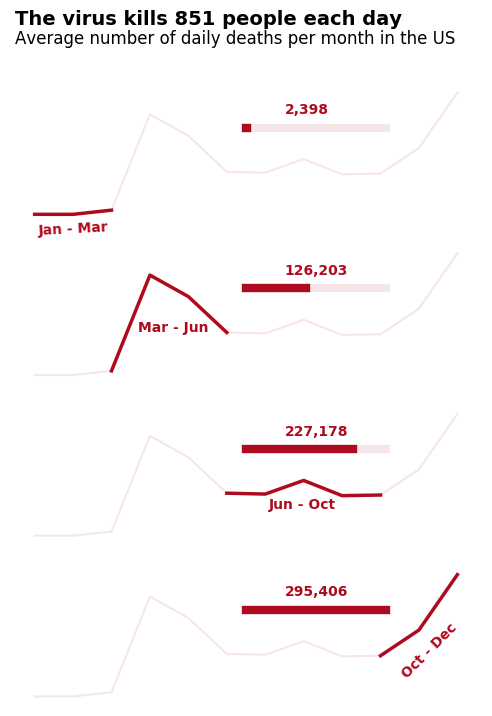

In [8]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=4, ncols=1,
                                         figsize=(6,8))
axes = [ax1, ax2, ax3, ax4]
for ax in axes:
    ax.plot(death_toll['Month'], death_toll['New_deaths'],color='#af0b1e', alpha=0.1)
    ax.set_yticklabels([])
    ax.set_xticklabels([])
    ax.tick_params(bottom=False, left=False,top=False)
    for location in ['left', 'right', 'bottom', 'top']:
       ax.spines[location].set_visible(False)  #used to remove the splines 


##overlaying redlines on the existing one to higligt a specific quarter
##per graph

ax1.plot(death_toll['Month'][:3], death_toll['New_deaths'][:3],
         color='#af0b1e', linewidth=2.5)
ax2.plot(death_toll['Month'][2:6], death_toll['New_deaths'][2:6],
         color='#af0b1e', linewidth=2.5)

ax3.plot(death_toll['Month'][5:10], death_toll['New_deaths'][5:10],
         color='#af0b1e', linewidth=2.5)
ax4.plot(death_toll['Month'][9:12], death_toll['New_deaths'][9:12],
         color='#af0b1e', linewidth=2.5)


# adding text to graph
ax1.text(1.1, -300, 'Jan - Mar', color='#af0b1e',
         weight='bold', rotation=3)
ax2.text(3.7, 800, 'Mar - Jun', color='#af0b1e', weight='bold')
ax3.text(7.1, 500, 'Jun - Oct', color='#af0b1e', weight='bold')
ax4.text(10.5, 1200, 'Oct - Dec', color='#af0b1e', weight='bold',
        rotation=45)


#adding title and subtitle
ax1.text(x=0.5, y=3500,
        s='The virus kills 851 people each day',
        weight='bold', size=14)
ax1.text(x=0.5, y=3150,
        s='Average number of daily deaths per month in the US',
        size=12)

#adding progress bars 
for ax,xmax,death in zip(axes, xmax_vals,deaths):
  ax.axhline(y=1600, xmin=0.5, xmax=0.8,
           linewidth=6, color='#af0b1e', alpha=0.1)
  ax.axhline(y=1600, xmin=0.5, xmax=xmax,
               linewidth=6, color='#af0b1e')
  ax.text(7.5, 1850, format(death, ','),
            color='#af0b1e', weight='bold')

plt.show()
    


### Matplotlib Styles: FiveThirtyEight Case Study

In [9]:
import matplotlib.pyplot as plt
import matplotlib.style as style
#style.available  see all the available style
#style.use('default')


In [10]:
import pandas as pd
red_wine = pd.read_csv('./winequality-red.csv', sep=';')
red_corr = red_wine.corr()['quality'][:-1]
white_wine = pd.read_csv('./winequality-white.csv', sep=';')
white_corr = white_wine.corr()['quality'][:-1]
print(white_corr.sort_values())

density                -0.307123
chlorides              -0.209934
volatile acidity       -0.194723
total sulfur dioxide   -0.174737
fixed acidity          -0.113663
residual sugar         -0.097577
citric acid            -0.009209
free sulfur dioxide     0.008158
sulphates               0.053678
pH                      0.099427
alcohol                 0.435575
Name: quality, dtype: float64


In [11]:
red_wine.corr()['quality'][:-1].sort_values()

volatile acidity       -0.390558
total sulfur dioxide   -0.185100
density                -0.174919
chlorides              -0.128907
pH                     -0.057731
free sulfur dioxide    -0.050656
residual sugar          0.013732
fixed acidity           0.124052
citric acid             0.226373
sulphates               0.251397
alcohol                 0.476166
Name: quality, dtype: float64

#### Starting Point

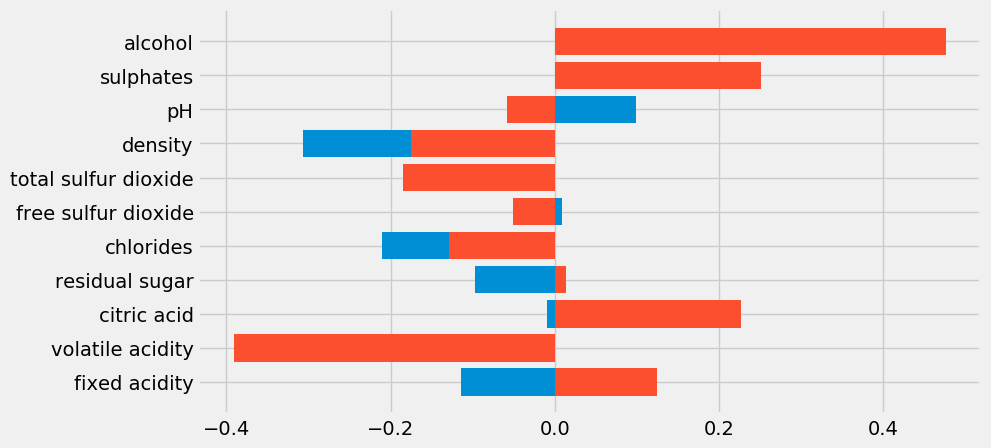

In [12]:
style.use('fivethirtyeight')
fig, ax = plt.subplots(figsize=(9, 5))
ax.barh(white_corr.index, white_corr)
ax.barh(red_corr.index, red_corr)
plt.show()

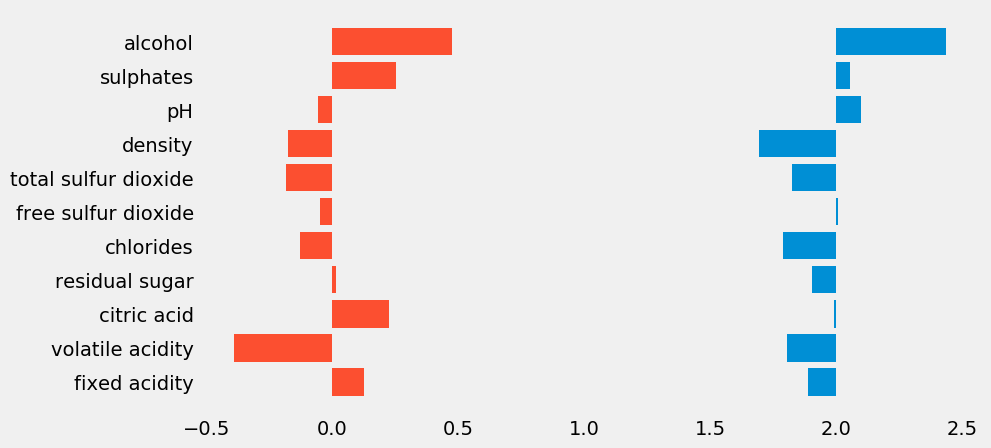

In [13]:
style.use('fivethirtyeight')
fig, ax = plt.subplots(figsize=(9, 5))
ax.barh(white_corr.index, white_corr, left=2)
ax.barh(red_corr.index, red_corr)
ax.grid([])  ## remove the gridlines
plt.show()

In [14]:
red_corr>0

fixed acidity            True
volatile acidity        False
citric acid              True
residual sugar           True
chlorides               False
free sulfur dioxide     False
total sulfur dioxide    False
density                 False
pH                      False
sulphates                True
alcohol                  True
Name: quality, dtype: bool

In [15]:
positive_map = white_corr>0
color_map_white = positive_map.map({True:'#33A1C9',
                                      False:'#ffae42'}
                                    )
color_map_white

fixed acidity           #ffae42
volatile acidity        #ffae42
citric acid             #ffae42
residual sugar          #ffae42
chlorides               #ffae42
free sulfur dioxide     #33A1C9
total sulfur dioxide    #ffae42
density                 #ffae42
pH                      #33A1C9
sulphates               #33A1C9
alcohol                 #33A1C9
Name: quality, dtype: object

In [16]:
positive_red = red_corr >= 0
color_map_red = positive_red.map({True:'#33A1C9', False:'#ffae42'})

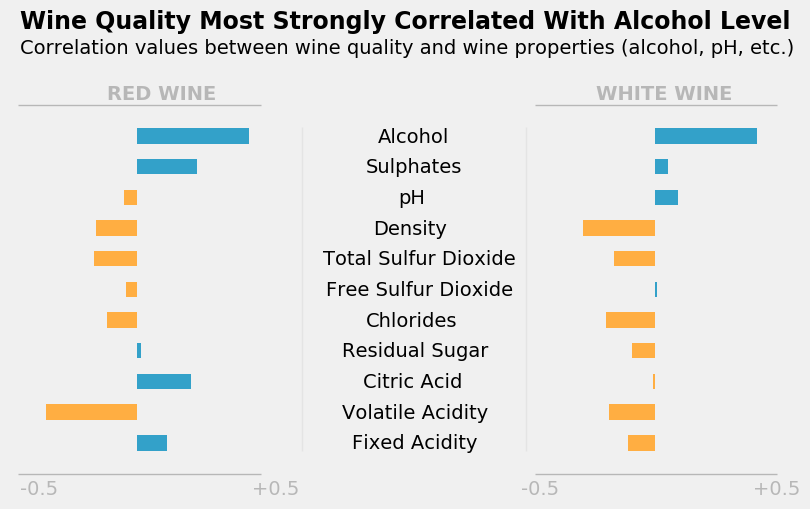

In [17]:
style.use('fivethirtyeight')
fig, ax = plt.subplots(figsize=(9, 5))
#height parameter controls the bar width
#left parameter moves the graph to the right if +ive , to the left if -ive

ax.barh(white_corr.index, white_corr, left=2, height=0.5,color=color_map_white)
ax.barh(red_corr.index, red_corr, height=0.5, left=-0.2,color=color_map_red)

##removeing unneeded elements to increase the data-ink ratio
ax.set_xticklabels([]) ##remove the x labels
ax.set_yticklabels([]) ##remove the y labels
ax.grid([])  ## remove the gridlines
ax.tick_params(bottom=False, left=False,top=False)
for location in ['left', 'right', 'bottom', 'top']:
       ax.spines[location].set_visible(False)  #used to remove the splines 


###adding the structural elements
# Assume the rest of the code is written
x_coords = {'Alcohol': 0.82, 'Sulphates': 0.77, 'pH': 0.91,
            'Density': 0.80, 'Total Sulfur Dioxide': 0.59,
            'Free Sulfur Dioxide': 0.6, 'Chlorides': 0.77,
            'Residual Sugar': 0.67, 'Citric Acid': 0.76,
            'Volatile Acidity': 0.67, 'Fixed Acidity': 0.71}
y_coord = 9.8

for y_label, x_coord in x_coords.items():
    ax.text(x_coord, y_coord, y_label)
    y_coord -= 1
    
###adding line to the y-axis of the graph
# Solution Code
ax.axvline(0.5, c='grey', alpha=0.1, linewidth=1,
           ymin=0.1, ymax=0.9)
ax.axvline(1.45, c='grey', alpha=0.1, linewidth=1,
           ymin=0.1, ymax=0.9)

###adding line to the x-axis of the graph
ax.axhline(-1, color='grey', linewidth=1, alpha=0.5,
          xmin=0.01, xmax=0.32)
ax.axhline(-1, color='grey', linewidth=1, alpha=0.5,
           xmin=0.67, xmax=0.98)

# adding custom labesl -0.5-------+0.5
ax.text(-0.7, -1.7, '-0.5'+ ' '*31 + '+0.5',
        color='grey', alpha=0.5)
ax.text(1.43, -1.7, '-0.5'+ ' '*31 + '+0.5',
        color='grey', alpha=0.5)

##adding title text to each graph "RED WINE" & "WHITE WINE"
ax.axhline(11, color='grey', linewidth=1, alpha=0.5,
          xmin=0.01, xmax=0.32)
ax.axhline(11, color='grey', linewidth=1, alpha=0.5,
           xmin=0.67, xmax=0.98)

ax.text(-0.33, 11.2, 'RED WINE',
        color='grey', alpha=0.5, weight='bold')
ax.text(1.75, 11.2, 'WHITE WINE',
        alpha=0.5,  weight='bold', color='grey')
ax.text(-0.7, 13.5, 'Wine Quality Most Strongly Correlated With Alcohol Level',
        weight='bold',size=17)
ax.text(-0.7, 12.7, 'Correlation values between wine quality and wine properties (alcohol, pH, etc.)',
          )

###adding a signature
#ax.text(-0.7, -2.9,
        #'©DATAQUEST' + ' '*94 + 'Source: P. Cortez et al.',
        #color = '#f0f0f0', backgroundcolor = '#4d4d4d',
        #size=12)

plt.show()